# SAN - Praktische Arbeit (Marvel Universe Social Network)

## Netzwerkanalyse

In [24]:
import os
import sys
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import scipy as sp
from helper import *

## Daten einlesen

In [25]:
nodes = pd.read_csv('Daten/nodes.csv')
edges = pd.read_csv('Daten/edges.csv')
hero_network = pd.read_csv('Daten/hero-network.csv')

print(nodes.head())
print(edges.head())
print(hero_network.head())

                   node   type
0               2001 10  comic
1                2001 8  comic
2                2001 9  comic
3  24-HOUR MAN/EMMANUEL   hero
4  3-D MAN/CHARLES CHAN   hero
                   hero   comic
0  24-HOUR MAN/EMMANUEL  AA2 35
1  3-D MAN/CHARLES CHAN   AVF 4
2  3-D MAN/CHARLES CHAN   AVF 5
3  3-D MAN/CHARLES CHAN   COC 1
4  3-D MAN/CHARLES CHAN  H2 251
                  hero1                 hero2
0         LITTLE, ABNER        PRINCESS ZANDA
1         LITTLE, ABNER  BLACK PANTHER/T'CHAL
2  BLACK PANTHER/T'CHAL        PRINCESS ZANDA
3         LITTLE, ABNER        PRINCESS ZANDA
4         LITTLE, ABNER  BLACK PANTHER/T'CHAL


# Verbindung zwischen captain america,ironman and spiderman

Im EDA haben wir herausgefunden, dass Captain America, Ironman und Spider-Man im `hero-network.csv` die meisten verbindungen haben. Wir wollen nun herausfinden, wie die  anderen Helden mit unseren "Haupt-Helden" verbunden sind und welche Helden nur auf einen, mit zwei oder drei "Haupt-Helden" verbunden sind.

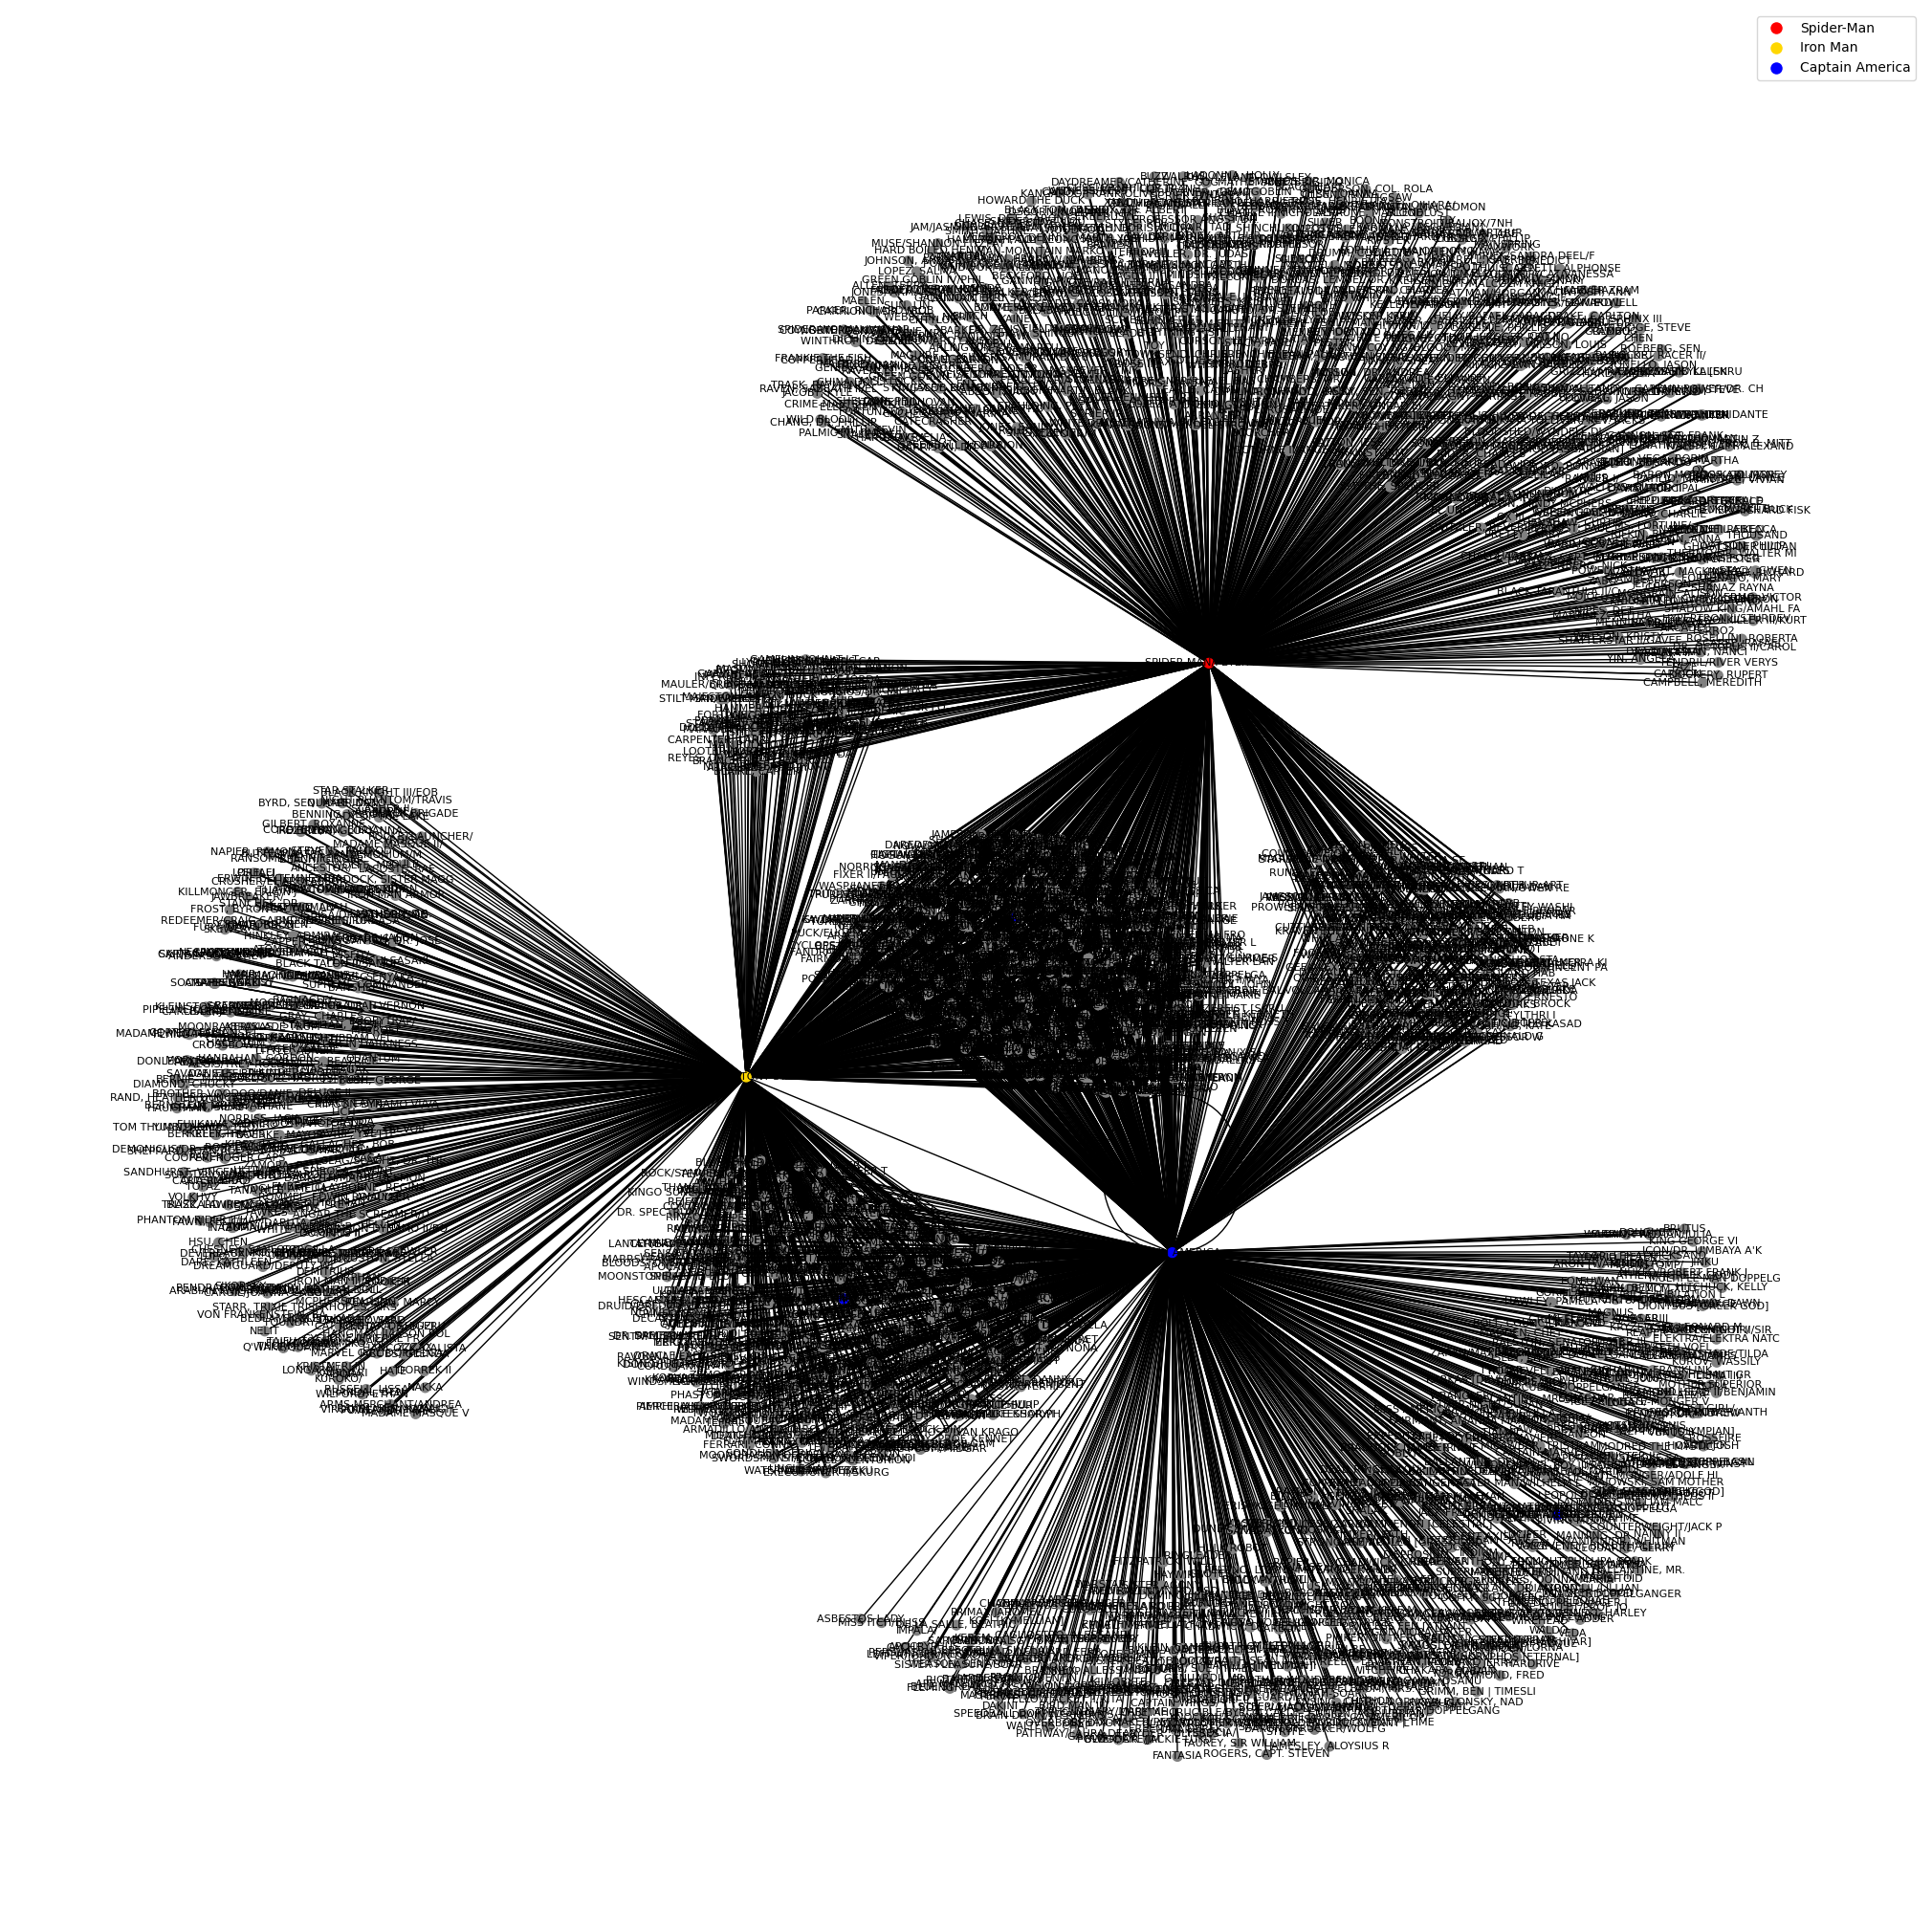

In [26]:
# connection between captain america,ironman and spiderman
captAmerica = Subset = hero_network[hero_network['hero1'] == 'CAPTAIN AMERICA']
ironMan = hero_network[hero_network['hero1'].str.contains('IRON MAN/TONY STARK')]
spiderMan = hero_network[hero_network['hero1'].str.contains('SPIDER-MAN/PETER PAR')]
Subset = pd.concat([captAmerica, ironMan, spiderMan], axis=0)

G = nx.from_pandas_edgelist(Subset, 'hero1', 'hero2')

node_colors = []

for node in G.nodes():
    if 'SPIDER-MAN/PETER PAR' in node:
        node_colors.append('red')  # Spider-Man in Rot
    elif 'IRON MAN/TONY STARK' in node:
        node_colors.append('gold')  # Iron Man in Gold
    elif 'CAPTAIN AMERICA' in node:
        node_colors.append('blue')  # Captain America in Blau
    else:
        node_colors.append('grey')  # Alle anderen Knoten in Grau
        
plt.figure(figsize=(20, 20))
nx.draw(G, node_color=node_colors, with_labels=True, node_size=50, font_size=8)

# Create a legend
red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Spider-Man',
                          markersize=10, markerfacecolor='red')
gold_patch = plt.Line2D([0], [0], marker='o', color='w', label='Iron Man',
                          markersize=10, markerfacecolor='gold')
blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Captain America',
                          markersize=10, markerfacecolor='blue')
plt.legend(handles=[red_patch, gold_patch, blue_patch])

plt.show()

Wir sehen, dass Captain America und Spider Man sehr viele Einzelne verbindungen zu Helden haben. Es gibt auch sehr viele Helden, welche eine Verbingung zu allen 3 "Haupt-Helden" haben. Zudem ist gut zu erkennen, dass es es sehr wenige Helden gibt, die zu Iron Man und Spider Man verbunden sind. Um das angewendete Prizip ein bisschen besser veranzuschaulichen, visualisieren wir im folgenden Plot noch eine vereinfachte Version des Netzwerkes mit 25 samples pro "Haupt-Held".

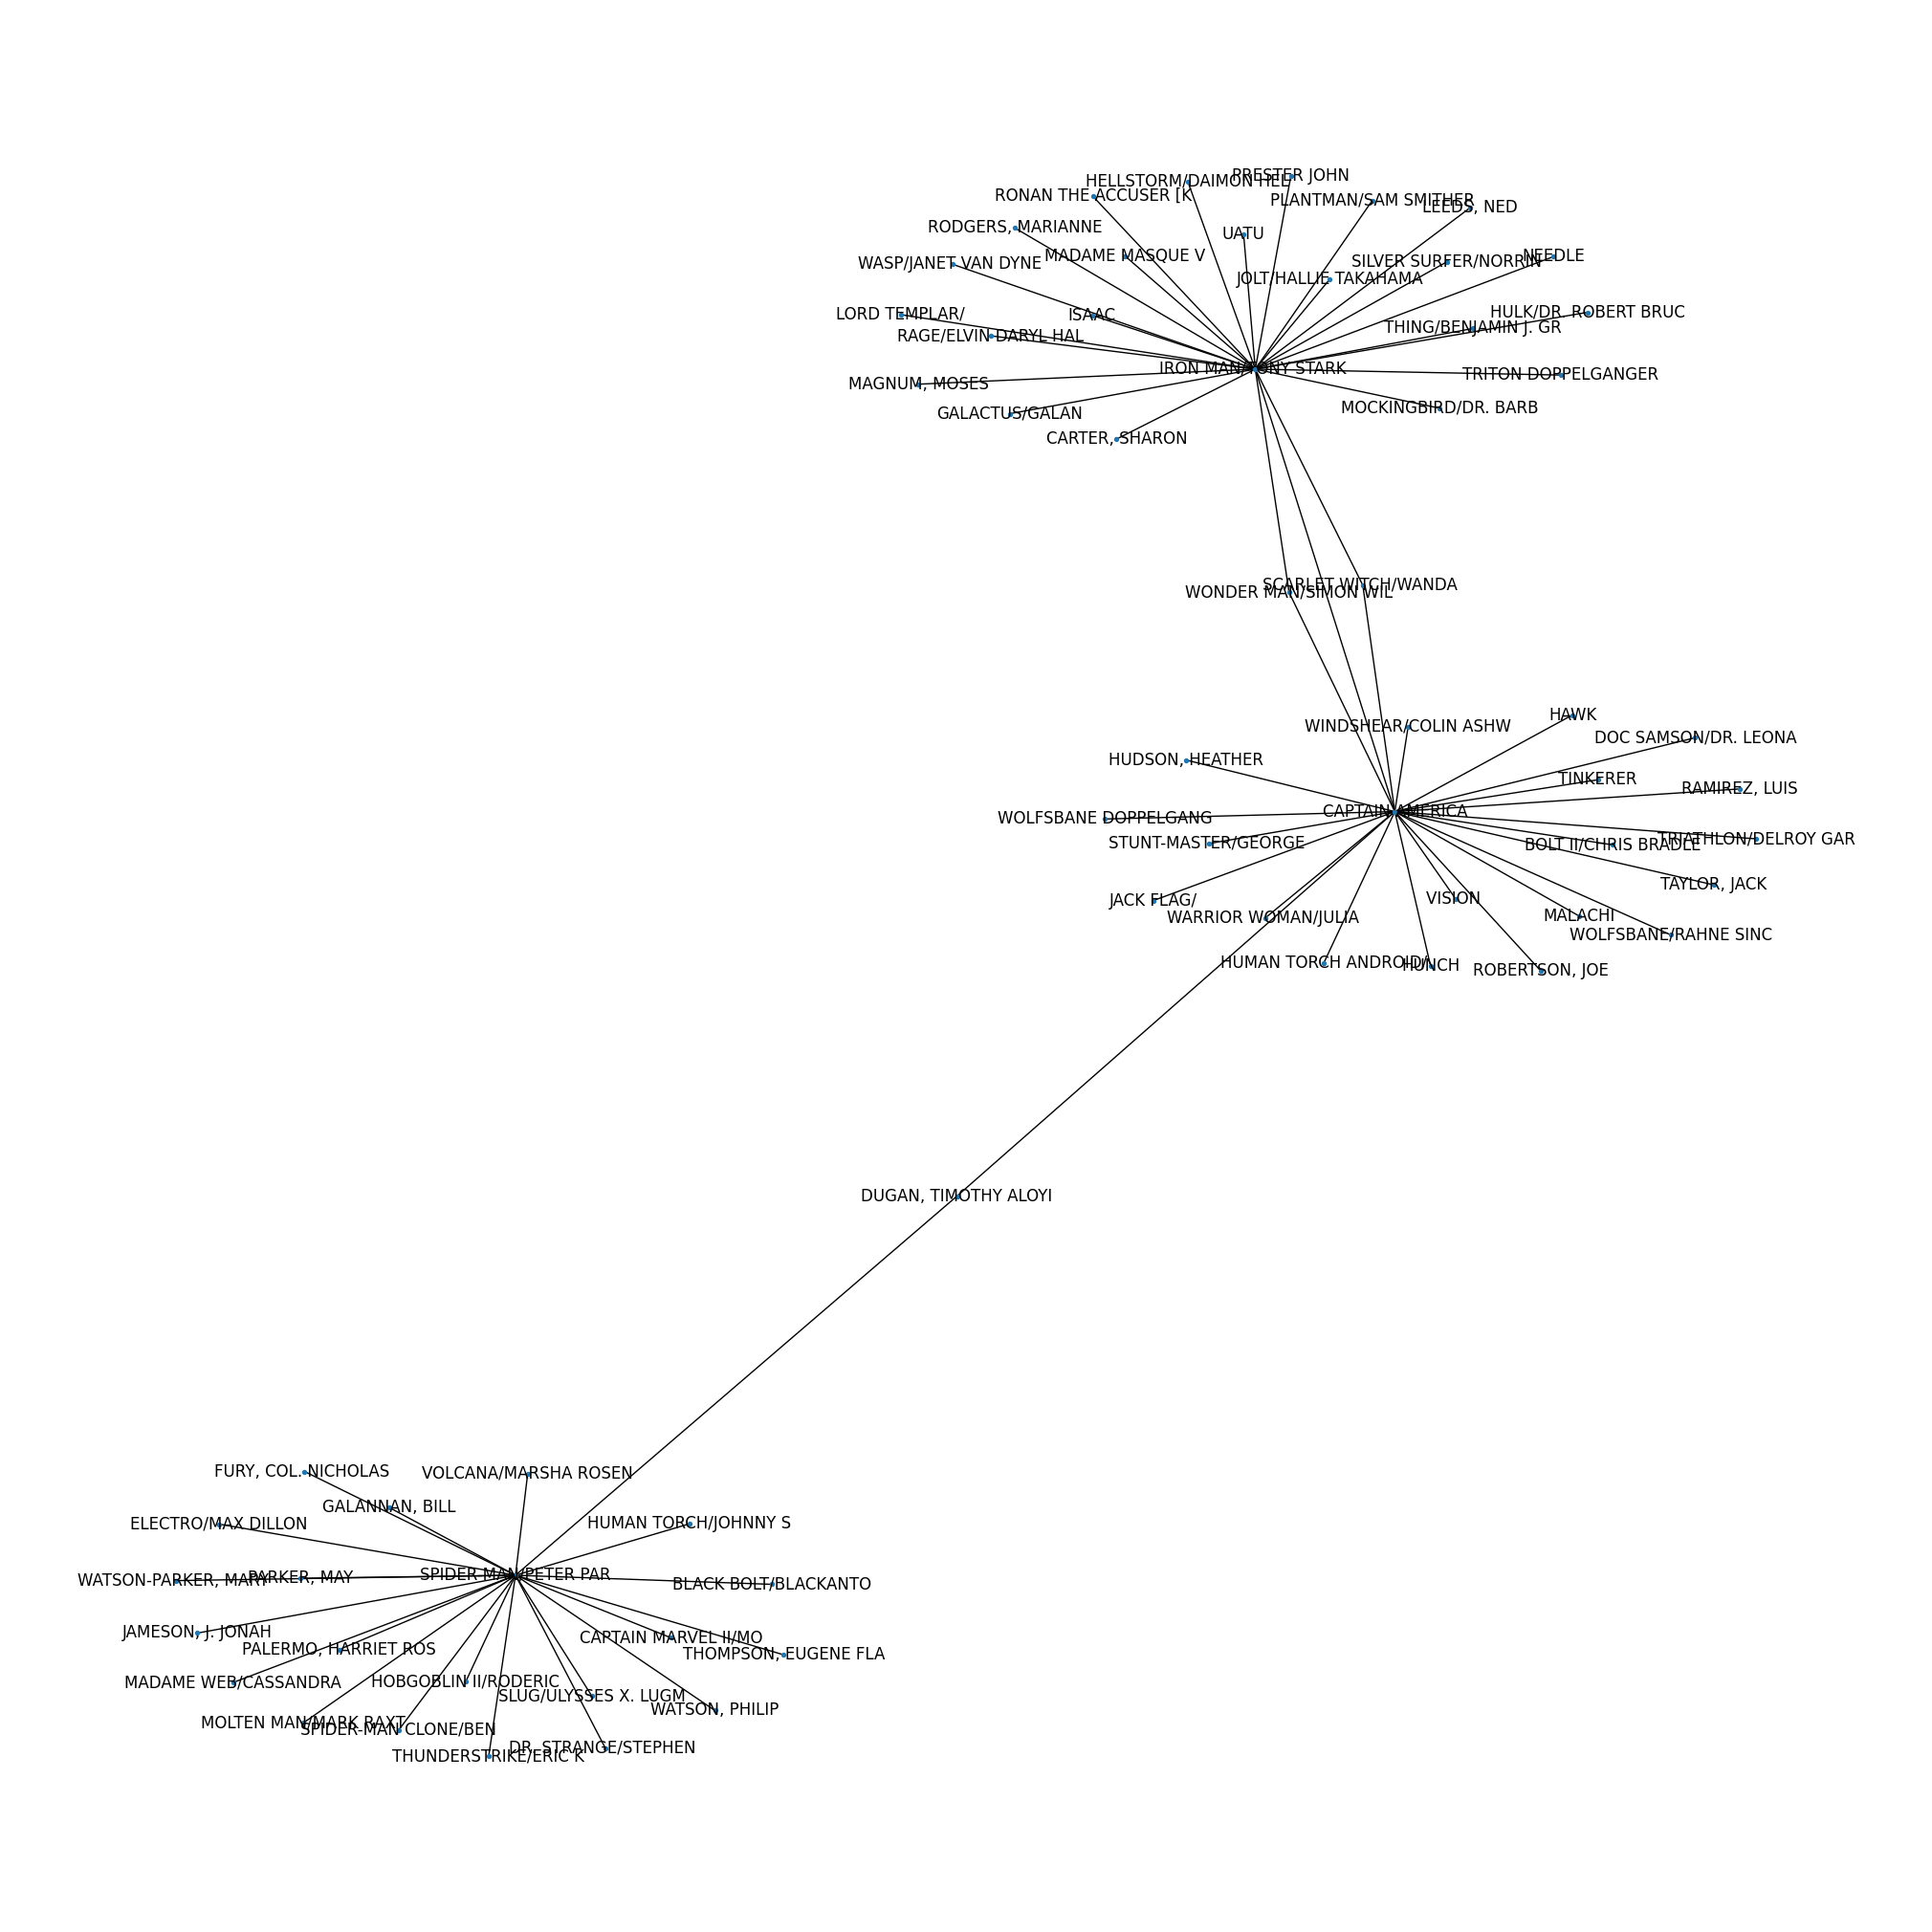

In [30]:
# connection between captain america,ironman and spiderman
captAmerica = Subset = hero_network[hero_network['hero1'] == 'CAPTAIN AMERICA'].sample(25)
ironMan = hero_network[hero_network['hero1'].str.contains('IRON MAN/TONY STARK')].sample(25)
spiderMan = hero_network[hero_network['hero1'].str.contains('SPIDER-MAN/PETER PAR')].sample(25)
Subset = pd.concat([captAmerica, ironMan, spiderMan], axis=0)

G = nx.from_pandas_edgelist(Subset, 'hero1', 'hero2')

plt.figure(figsize=(20, 20))
nx.draw(G, with_labels=True, node_size=8)
plt.show()

Uns interessiert nun die genaue Anzahl der Verbindungen. Dazu erstellen wir eine Tabelle mit den Anzahl Verbindungen zu den "Haupt-Helden".

In [32]:
# To create the table as requested, we need to count the connections based on the criteria given.
# We will assume that the hero_network dataframe has already been loaded as per previous code snippets.

# Filtering data for each main hero
capt_america_connections = hero_network[hero_network['hero1'] == 'CAPTAIN AMERICA']
iron_man_connections = hero_network[hero_network['hero1'].str.contains('IRON MAN/TONY STARK')]
spiderman_connections = hero_network[hero_network['hero1'].str.contains('SPIDER-MAN/PETER PAR')]

# Counting connections for each main hero
capt_america_count = capt_america_connections['hero2'].nunique()
iron_man_count = iron_man_connections['hero2'].nunique()
spiderman_count = spiderman_connections['hero2'].nunique()

# Counting mutual connections
capt_america_iron_man = hero_network[(hero_network['hero1'] == 'CAPTAIN AMERICA') & 
                                      hero_network['hero2'].str.contains('IRON MAN/TONY STARK')].shape[0]
capt_america_spiderman = hero_network[(hero_network['hero1'] == 'CAPTAIN AMERICA') & 
                                       hero_network['hero2'].str.contains('SPIDER-MAN/PETER PAR')].shape[0]
iron_man_spiderman = hero_network[(hero_network['hero1'].str.contains('IRON MAN/TONY STARK')) & 
                                  hero_network['hero2'].str.contains('SPIDER-MAN/PETER PAR')].shape[0]

# Counting connections between all three
all_three_connections = hero_network[(hero_network['hero1'].str.contains('CAPTAIN AMERICA') & 
                                      hero_network['hero2'].str.contains('IRON MAN/TONY STARK')) |
                                     (hero_network['hero1'].str.contains('IRON MAN/TONY STARK') & 
                                      hero_network['hero2'].str.contains('SPIDER-MAN/PETER PAR')) |
                                     (hero_network['hero1'].str.contains('CAPTAIN AMERICA') & 
                                      hero_network['hero2'].str.contains('SPIDER-MAN/PETER PAR'))].shape[0]

# Creating the table
table_data = {
    'Connection': ['Captain America', 'Captain America - Spiderman', 'Captain America - Iron Man',
                   'Iron Man', 'Iron Man - Spiderman', 'Spiderman', 
                   'Captain America - Iron Man - Spiderman'],
    'Number of Connections': [capt_america_count, capt_america_spiderman, capt_america_iron_man,
                              iron_man_count, iron_man_spiderman, spiderman_count,
                              all_three_connections]
}

connection_table = pd.DataFrame(table_data)

connection_table.sort_values(by='Number of Connections', ascending=False)



,Connection,Number of Connections
0,Captain America,1426
5,Spiderman,1286
3,Iron Man,1132
6,Captain America - Iron Man - Spiderman,353
2,Captain America - Iron Man,220
1,Captain America - Spiderman,79
4,Iron Man - Spiderman,54


- wie viele und welche sind mit alle 3 verbunden?

- wie viele und welche nur mit spider man / captain america / iron man

- wie viele und welche mit 2 helden verbunden sind

- 